# IN3050/IN4050 Mandatory Assignment 3: Unsupervised Learning

**Name:** Sunniva Kiste Bergan

**Username:** sunnikbe

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo" https://www.uio.no/english/about/regulations/studies/studies-examinations/routines-cheating.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, April 21, 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

## Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the exercise
This exercise has three parts. The first part is focused on Principal Component Analysis (PCA). You will go through some basic theory, and implent PCA from scratch to do compression and visualization of data.

The second part focuses on clustering using K-means. You will use `scikit-learn` to run K-means clustering, and use PCA to visualize the results.

The last part ties supervised and unsupervised learning together in an effort to evaluate the output of K-means using a logistic regression for multi-class classification approach.

The master students will also have to do one extra part about tuning PCA to balance compression with information lost.


### Tools
You may freely use code from the weekly exercises and the published solutions. In the first part about PCA you may **NOT** use ML libraries like `scikit-learn`. In the K-means part and beyond we encurage the use of `scikit-learn` to iterate quickly on the problems.

### Beware
This is a new assignment. There might occur typos or ambiguities. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your
own and explain them!

# Principal Component Analysis (PCA)
In this section, you will work with the PCA algorithm in order to understand its definition and explore its uses.

## Implementation: how is PCA implemented?
Here we implement the basic steps of PCA and we assemble them.

### Importing libraries
We start importing the *numpy* library for performing matrix computations, the *pyplot* library for plotting data, and the *syntheticdata* module to import synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import syntheticdata

### Centering the Data
Implement a function with the following signature to center the data as explained in *Marsland*.

In [3]:
def center_data(A):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)

    # calculate the means of each column
    feature_means = np.mean(A, axis = 0) # (keepdims = True)??

    
    # subtract the column means from each sample
    X = A - feature_means

    # OUTPUT:
    # X    [NxM] numpy centered data matrix (N samples, M features)
    return X

Test your function checking the following assertion on *testcase*:

In [6]:
testcase = np.array([[3.,11.,4.3],[4.,5.,4.3],[5.,17.,4.5],[4,13.,4.4]])
answer = np.array([[-1.,-0.5,-0.075],[0.,-6.5,-0.075],[1.,5.5,0.125],[0.,1.5,0.025]])
np.testing.assert_array_almost_equal(center_data(testcase), answer)

### Computing Covariance Matrix
Implement a function with the following signature to compute the covariance matrix as explained in *Marsland*.

In [7]:
def compute_covariance_matrix(A):
    # INPUT:
    # A    [NxM] centered numpy data matrix (N samples, M features)
    
    # N samples
    N = A.shape[0]

    # OUTPUT:
    # C    [MxM] numpy covariance matrix (M features, M features)
    #
    # Do not apply centering here. We assume that A is centered before this function is called.

    # creates a symmetric MxM matrix
    C = np.dot(A.T, A)/N
    
    return C

Test your function checking the following assertion on *testcase*:

In [8]:
testcase = center_data(np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5],[28.,14.,7]]))
answer = np.array([[580.,290.,145.],[290.,145.,72.5],[145.,72.5,36.25]])

# Depending on implementation the scale can be different:
to_test = compute_covariance_matrix(testcase)

answer = answer/answer[0, 0]
to_test = to_test/to_test[0, 0]

np.testing.assert_array_almost_equal(to_test, answer)

### Computing eigenvalues and eigenvectors
Use the linear algebra package of `numpy` and its function `np.linalg.eig()` to compute eigenvalues and eigenvectors. Notice that we take the real part of the eigenvectors and eigenvalues. The covriance matrix *should* be a symmetric matrix, but the actual implementation in `compute_covariance_matrix()` can lead to small round off errors that lead to tiny imaginary additions to the eigenvalues and eigenvectors. These are purely numerical artifacts that we can safely remove.

**Note:** If you decide to NOT use `np.linalg.eig()` you must make sure that the eigenvalues you compute are of unit lenght!

In [9]:
def compute_eigenvalue_eigenvectors(A):
    # INPUT:
    # A    [DxD] numpy matrix
    #
    # OUTPUT:
    # eigval    [D] numpy vector of eigenvalues
    # The eigenvalues represents the magnitude of the eigenvectors 

    # eigvec    [DxD] numpy array of eigenvectors
    # The eigenvectors represent the direction of which the dataset has the most variance
        
    eigval, eigvec = np.linalg.eig(A)
    
    # The column eigvec[:,i] corresponds to the eigenvalue eigval[i]
    
    # Numerical roundoff can lead to (tiny) imaginary parts. We correct that here.
    eigval = eigval.real
    eigvec = eigvec.real
    
    return eigval, eigvec

Test your function checking the following assertion on *testcase*:

In [10]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([2.,5.,3.])
answer2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### Sorting eigenvalues and eigenvectors
Implement a function with the following signature to sort eigenvalues and eigenvectors as explained in *Marsland*.

Remember that eigenvalue *eigval[i]* corresponds to eigenvector *eigvec[:,i]*.

In [17]:
def sort_eigenvalue_eigenvectors(eigval, eigvec):
    # INPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    #
    # OUTPUT:
    # sorted_eigval    [D] numpy vector of eigenvalues
    # sorted_eigvec    [DxD] numpy array of eigenvectors
    
    # sorting indices in decending order
    si = np.argsort(eigval)[::-1]

    sorted_eigval = eigval[si]

    # sorting eigenvectors based on the sorting of the eigvals
    sorted_eigvec = eigvec[:,si]
    
    return sorted_eigval, sorted_eigvec

Test your function checking the following assertion on *testcase*:

In [18]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([5.,3.,2.])
answer2 = np.array([[0.,0.,1.],[1.,0.,0.],[0.,1.,0.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
x,y = sort_eigenvalue_eigenvectors(x,y)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### PCA Algorithm
Implement a function with the following signature to compute PCA as explained in *Marsland* using the functions implemented above.

In [51]:
def pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    
    # 1. center data
    centered_A = center_data(A)
    # 2. covariance matrix
    covariance_A = compute_covariance_matrix(centered_A)
    # 3. eigenvalue, eigenvectos
    eigval, eigvec = compute_eigenvalue_eigenvectors(covariance_A)
    # 4. sort eigenvalues and eigenvectors 
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)
    
    # OUTPUT:
    # pca_eigvec    [Mxm] numpy matrix containing the eigenvectors (M dimensions, m eigenvectors)
    # P             [Nxm] numpy PCA data matrix (N samples, m features)
    
    M = sorted_eigval.shape[0]
    # m learned features (The m higest of the eigenvalues (their corresponding eigenvectors))
    # indexing the first m columns of sorted eigvecs
    pca_eigvec = sorted_eigvec[:, :m]
    
    # projecting centered_A onto the space spanned by pca_eigvecs
    P = np.dot(centered_A, sorted_eigvec)[:, :m]
    
    return pca_eigvec, P

Test your function checking the following assertion on *testcase*:

In [52]:
testcase = np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5]])
x,y = pca(testcase,2)

import pickle
answer1_file = open('PCAanswer1.pkl','rb'); answer2_file = open('PCAanswer2.pkl','rb')
answer1 = pickle.load(answer1_file); answer2 = pickle.load(answer2_file)


test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))


test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))
np.testing.assert_almost_equal(test_arr_y, 0)

## Understanding: how does PCA work?
We now use the PCA algorithm you implemented on a toy data set in order to understand its inner workings.

### Loading the data
The module *syntheticdata* provides a small synthetic dataset of dimension [100x2] (100 samples, 2 features).

In [53]:
X = syntheticdata.get_synthetic_data1()

### Visualizing the data
Visualize the synthetic data using the function *scatter()* from the *matplotlib* library.

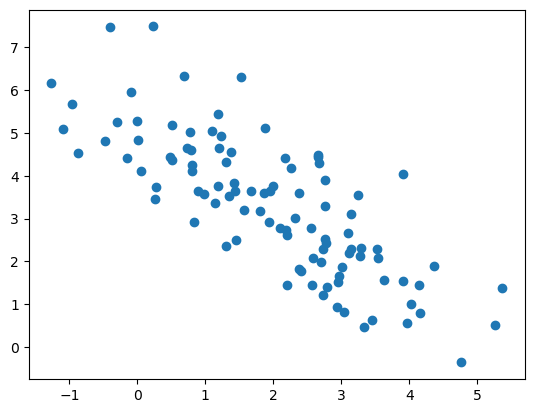

In [55]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### Visualize the centered data
Notice that the data visualized above is not centered on the origin (0,0). Use the function defined above to center the data, and the replot it.

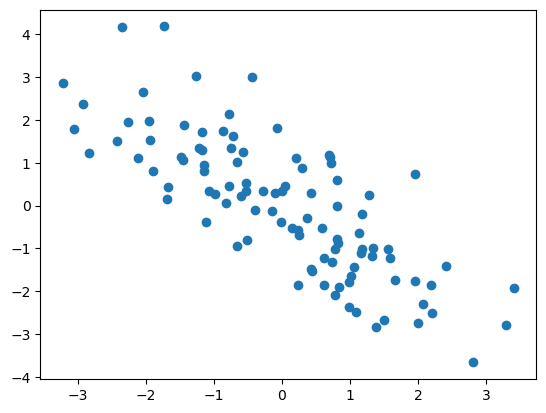

In [102]:
X = center_data(syntheticdata.get_synthetic_data1())
plt.scatter(X[:,0], X[:,1])
plt.show()

### Visualize the first eigenvector
Visualize the vector defined by the first eigenvector.
To do this you need:
- Use the *PCA()* function to recover the eigenvectors
- Plot the centered data as done above 
- The first eigenvector is a 2D vector (x0,y0). This defines a vector with origin in (0,0) and head in (x0,y0). Use the function *plot()* from matplotlib to plot a line over the first eigenvector.

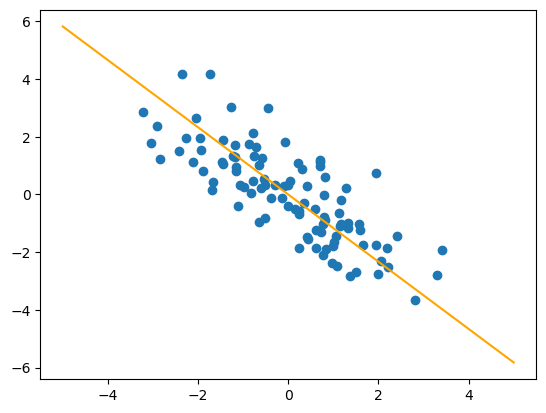

In [103]:

pca_eigvec, _ = pca(X, 2)
# first column is the first eigenvector
first_eigvec = pca_eigvec[:,0]

# plotting centered data
plt.scatter(X[:,0], X[:,1])

x = np.linspace(-5, 5, 1000)
y = first_eigvec[1]/first_eigvec[0] * x
plt.plot(x,y, c = "orange")
plt.show()

### Visualize the PCA projection
Finally, use the *PCA()* algorithm to project on a single dimension and visualize the result using again the *scatter()* function.

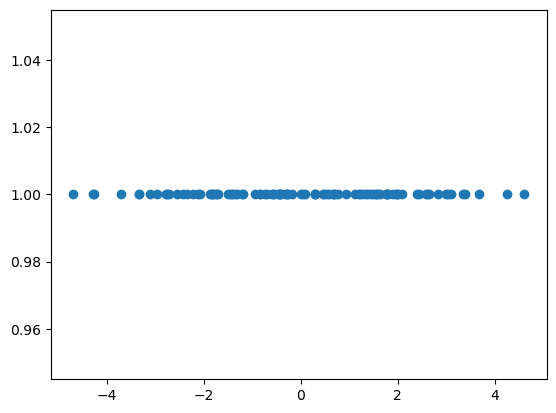

In [104]:
_,P = pca(X, 1)
y = np.ones(len(P))
plt.scatter(P, y)
plt.show()

## Evaluation: when are the results of PCA sensible?
So far we have used PCA on synthetic data. Let us now imagine we are using PCA as a pre-processing step before a classification task. This is a common setup with high-dimensional data. We explore when the use of PCA is sensible.

### Loading the first set of labels
The function *get_synthetic_data_with_labels1()* from the module *syntethicdata* provides a first labeled dataset.

In [95]:
X,y = syntheticdata.get_synthetic_data_with_labels1()

### Running PCA
Process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

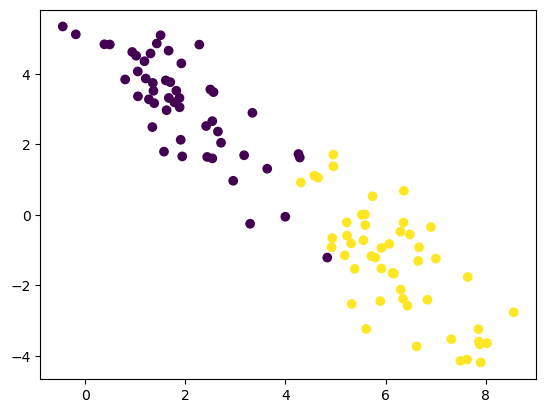

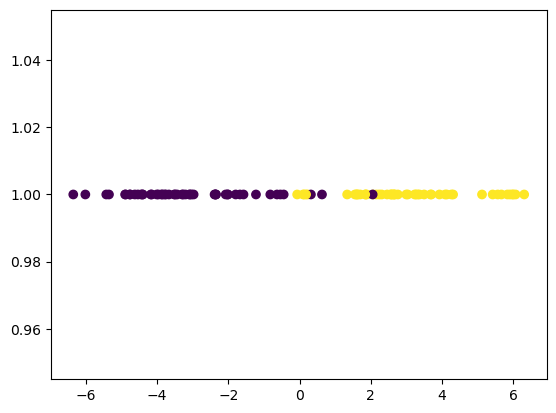

In [98]:
plt.scatter(X[:,0], X[:,1],c=y[:,0])
plt.show()

_,P = pca(X, 1)
plt.scatter(P,np.ones(P.shape[0]),c=y[:,0])
plt.show()

**Comment:** This result shows the spread of the clusters well in the x-direction. However, all the information about how the purple cluster is higer than the yellow cluster on the y-axis is completely lost.

### Loading the second set of labels
The function *get_synthetic_data_with_labels2()* from the module *syntethicdata* provides a second labeled dataset.

In [205]:
X,y = syntheticdata.get_synthetic_data_with_labels2()

### Running PCA
As before, process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

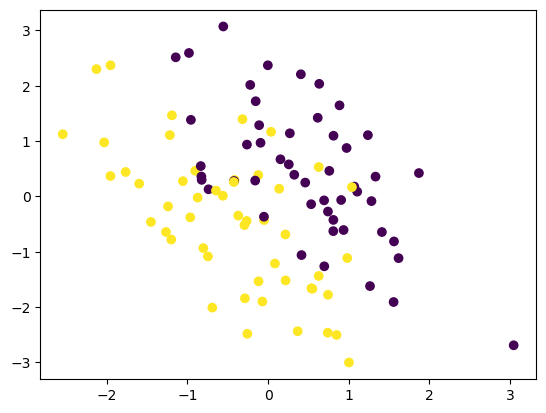

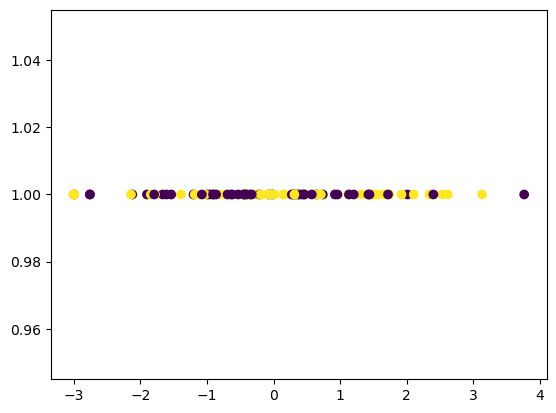

In [206]:
X_centered = center_data(X)

plt.scatter(X_centered[:,0], X_centered[:,1],c=y[:,0])
plt.show()

pca_eigvec,P = pca(X_centered, 1)
plt.scatter(P,np.ones(P.shape[0]),c=y[:,0])
plt.show()

**Comment:** In this projection, its not possible to seperate the clusters apart from colors. The fact that the purple cluster lies mostly above the eigenvector, and that the yellow cluster lies mostly below the eigenvector is not possible to differentiate from the 1D plot. A better approach would possibly be to plot the 1D line on a line perpendicular to the eigenvector. This would not show the spread along the eigenvector though, but it would show how the clusters are separated.

How would the result change if you were to consider the second eigenvector? Or if you were to consider both eigenvectors?

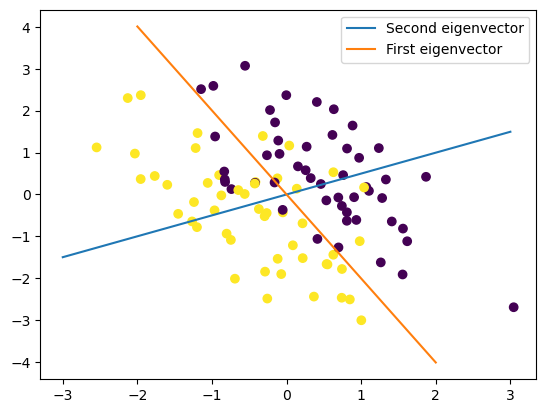

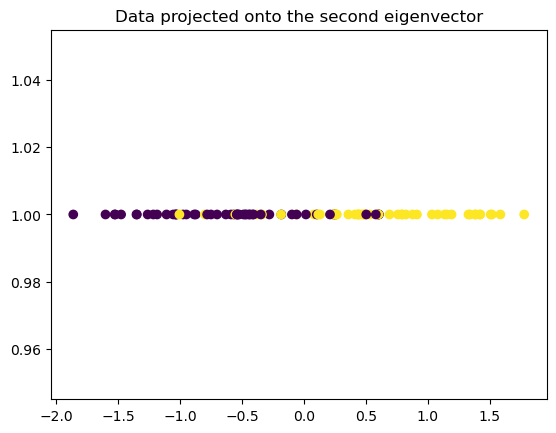

In [211]:
plt.scatter(X_centered[:,0], X_centered[:,1],c=y[:,0])

pca_eigvec,P = pca(X_centered, 2)

# plotting second eigvec
x2 = np.linspace(-3, 3, 1000)
y2 = pca_eigvec[:,1][1]/pca_eigvec[:,1][0] * x2
plt.plot(x2,y2, label = "Second eigenvector")
# plotting the first eigenvector also
x1 = np.linspace(-2, 2, 1000)
y1 = pca_eigvec[:,0][1]/pca_eigvec[:,0][0] * x1
plt.plot(x1,y1, label = "First eigenvector")
plt.legend()
plt.show()

# projecting onto second eigenvector
plt.title("Data projected onto the second eigenvector")
plt.scatter(P[:,1], np.ones(P[:,1].shape[0]), c=y[:,0])
plt.show()

**Answer**: Plotting the data onto the second eigenvector (orange) would show the clustering better, as is shown plotted in the bottom plot. I do not know how it would be possible to project using both eigenvectors for 1D, but adding together the eigenvectorvectors producing a vector that is inbetween the two eigenvectors would perhaps be an option, which would show more of the variance in the data as well as the clustering.

## Case study 1: PCA for visualization
We now consider the *iris* dataset, a simple collection of data (N=150) describing iris flowers with four (M=4) features. The features are: Sepal Length, Sepal Width, Petal Length and Petal Width. Each sample has a label, identifying each flower as one of 3 possible types of iris: Setosa, Versicolour, and Virginica.

Visualizing a 4-dimensional dataset is impossible; therefore we will use PCA to project our data in 2 dimensions and visualize it.

### Loading the data
The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [212]:
X,y = syntheticdata.get_iris_data()

### Visualizing the data by selecting features
Try to visualize the data (using label information) by randomly selecting two out of the four features of the data. You may try different pairs of features.

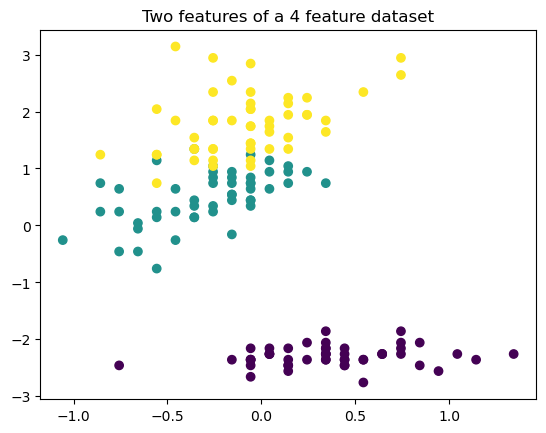

In [214]:
X_centered = center_data(X)

# dividing features
sepal_length = X_centered[:,0]
sepal_width = X_centered[:,1]
petal_length = X_centered[:,2]
petal_width = X_centered[:,3]

plt.title("Two features of a 4 feature dataset")
plt.scatter(sepal_width, petal_length, c = y)
plt.show()


### Visualizing the data by PCA
Process the data using PCA and visualize it (using label information). Compare with the previous visualization and comment on the results.

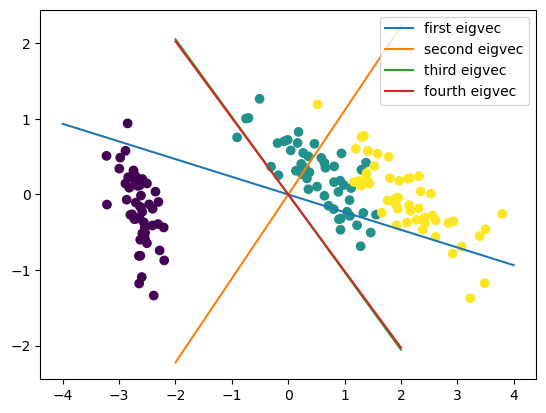

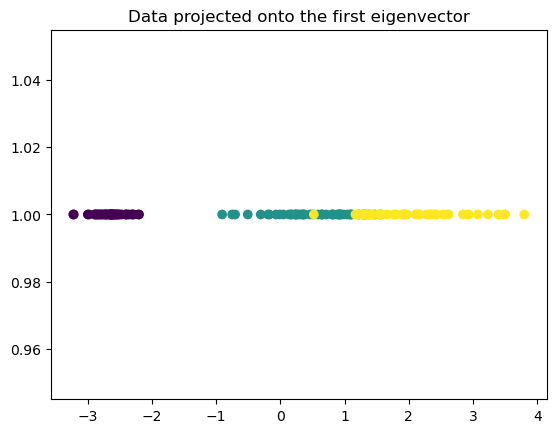

In [223]:
# running pca
pca_eigvec,P = pca(X_centered, 4)

# the first two columns will correspond to the two features 
# with the greatest variance (higest eigenvals), and provide 
# the best plot for visualizing the datapoints
plt.scatter(P[:,0], P[:,1], c = y)

# plotting all eigenvectors to evaluate which to project onto
# plotting first eigvec
x1 = np.linspace(-4, 4, len(P[:,0]))
y1 = pca_eigvec[:,0][1]/pca_eigvec[:,0][0] * x1
plt.plot(x1,y1, label = "first eigvec")

# plotting second eigvec
x2 = np.linspace(-2, 2, len(P[:,0]))
y2 = pca_eigvec[:,1][1]/pca_eigvec[:,1][0] * x2
plt.plot(x2,y2, label = "second eigvec")
plt.legend()

# plotting third eigvec
x2 = np.linspace(-2, 2, len(P[:,0]))
y2 = pca_eigvec[:,2][1]/pca_eigvec[:,2][0] * x2
plt.plot(x2,y2, label = "third eigvec")
plt.legend()

# plotting fouth eigvec
x2 = np.linspace(-2, 2, len(P[:,0]))
y2 = pca_eigvec[:,3][1]/pca_eigvec[:,3][0] * x2
plt.plot(x2,y2, label = "fourth eigvec")
plt.legend()
plt.show()

# If we were to want to use the data in one dimension.
# Projecting onto first eigenvector (this is the eigenvector with 
# the higest variance, but not necessarily the one dividing 
# the clusters in the "best" way. Altough, it is here.)
plt.title("Data projected onto the first eigenvector")
plt.scatter(P[:,0], np.ones(P[:,0].shape[0]), c = y)
plt.show()


**Comment:** The first plot (just choosing two of the features) makes it hard to separate the different types of flowers, at least the two types that are in a cluster together. After running pca and plotting, the clustering is more pronounced, but there is still hard to differentiate the teal and yellow clusters from eachother. Only one of the eigenvectors(the first) provide a good projection, which still does not divide the teal and yellow, and if we did not have the colour information, we would divide this dataset into two different categories, not three. 

If we were to extract the data from the teal and yellow clusters, which would be easy as it is clearly separated in the 1D plot, we could run pca on just this data again in order to separate the last two clusters.

## Case study 2: PCA for compression
We now consider the *faces in the wild (lfw)* dataset, a collection of pictures (N=1280) of people. Each pixel in the image is a feature (M=2914).

### Loading the data
The function *get_lfw_data()* from the module *syntethicdata* returns the *lfw* dataset. It returns a data matrix of dimension [1280x2914] and a label vector of dimension [1280]. It also returns two parameters, $h$ and $w$, reporting the height and the width of the images (these parameters are necessary to plot the data samples as images). Beware, it might take some time to download the data. Be patient :) 

In [224]:
X,y,h,w = syntheticdata.get_lfw_data()

### Inspecting the data
Choose one datapoint to visualize (first coordinate of the matrix $X$) and use the function [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot and inspect some of the pictures.

Notice that *imshow* receives as a first argument an image to be plot; the image must be provided as a rectangular matrix, therefore we reshape a sample from the matrix $X$ to have height $h$ and width $w$. The parameter *cmap* specifies the color coding; in our case we will visualize the image in black-and-white with different gradations of grey.

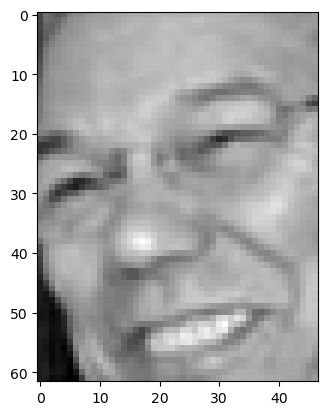

In [243]:
plt.imshow(X[530,:].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

### Implementing a compression-decompression function
Implement a function that first uses PCA to project samples in low-dimensions, and the reconstruct the original image.

*Hint:* Most of the code is the same as the previous PCA() function you implemented. You may want to refer to *Marsland* to check out how reconstruction is performed.

In [244]:
def encode_decode_pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    
    eigvec, P = pca(A, m)

    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    
    # multiply by the transposed pca eigvec matrix to reconstruct data
    Ahat = np.dot(P, eigvec.T)
    
    return Ahat

### Compressing and decompressing the data
Use the implemented function to encode and decode the data by projecting on a lower dimensional space of dimension 200 (m=200).

In [245]:
Xhat = encode_decode_pca(X,200)

### Inspecting the reconstructed data
Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

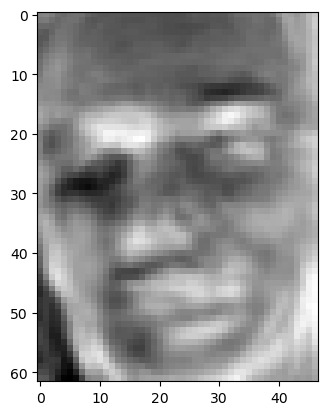

In [246]:
plt.imshow(Xhat[530,:].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

**Comment:** The reconstructed picture is a lot more unclear, but it still clearly resembles a face. Considering the data was reconstructed from 200 features back to 2914 features, it is not a bad result.

### Evaluating different compressions
Use the previous setup to generate compressed images using different values of low dimensions in the PCA algorithm (e.g.: 100, 200, 500, 1000). Plot and comment on the results.

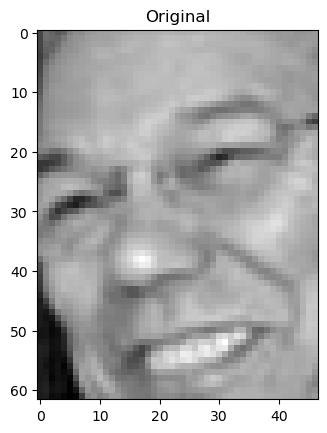

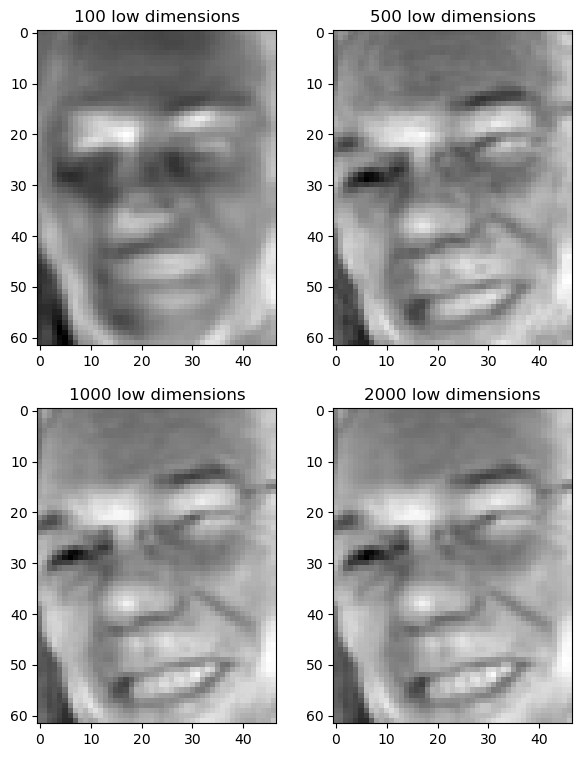

In [257]:
plt.imshow(X[530,:].reshape((h, w)), cmap=plt.cm.gray)
plt.title("Original")
plt.show()

fig, axs = plt.subplots(2, 2)
fig.set_figheight(9)
fig.set_figwidth(7)
titles = ["100", "500", "1000", "2000"]
low_dims = [100, 500, 1000, 2000]
axis = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]
for i in range(4):
    Xhat = encode_decode_pca(X, low_dims[i])
    axis[i].imshow(Xhat[530,:].reshape((h, w)), cmap=plt.cm.gray)
    axis[i].set_title(titles[i] + " low dimensions")
plt.show()



**Comment:** The compressed images of 500 low dimensions and above are not far from the original image. From earlier we know that the version with 200 low dimensions were not as recognizable as these, and the compressed image of 100 low dimensions just looks like a very smooth face with few facial features. I think the value I would use if I were to encode and decode images such as these is a low dimension somewhere between 500 and 1000. Then the images gets compressed to less than half its datasize and is reconstructed well enough to represent the original image.

# K-Means Clustering (Bachelor and master students)
In this section you will use the *k-means clustering* algorithm to perform unsupervised clustering. Then you will perform a qualitative assesment of the results.

### Importing scikit-learn library
We start importing the module *cluster.KMeans* from the standard machine learning library *scikit-learn*.

In [258]:
from sklearn.cluster import KMeans

### Loading the data
We will use once again the *iris* data set. The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [309]:
X,y = syntheticdata.get_iris_data()

### Projecting the data using PCA
To allow for visualization, we project our data in two dimensions as we did previously. This step is not necessary, and we may want to try to use *k-means* later without the PCA pre-processing. However, we use PCA, as this will allow for an easy visualization.

In [260]:
_,P = pca(X, 2)

### Running k-means
We will now consider the *iris* data set as an unlabeled set, and perform clustering to this unlabeled set. We can compare the results of the clustering to the lableled calsses.

Use the class *KMeans* to fit and predict the output of the *k-means* algorithm on the projected data. Run the algorithm using the following values of $k=\{2,3,4,5\}$. 

In [280]:

k = [2, 3, 4, 5]
yhat_list = []

for i in range((len(k))):
    KM = KMeans(k[i])
    yhat_list.append(KM.fit_predict(P))


/Users/sunnivakbergan/miniconda3/envs/in3050/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sunnivakbergan/miniconda3/envs/in3050/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sunnivakbergan/miniconda3/envs/in3050/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sunnivakbergan/miniconda3/envs/in3050/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

### Qualitative assessment
Plot the results of running the k-means algorithm, compare with the true labels, and comment.

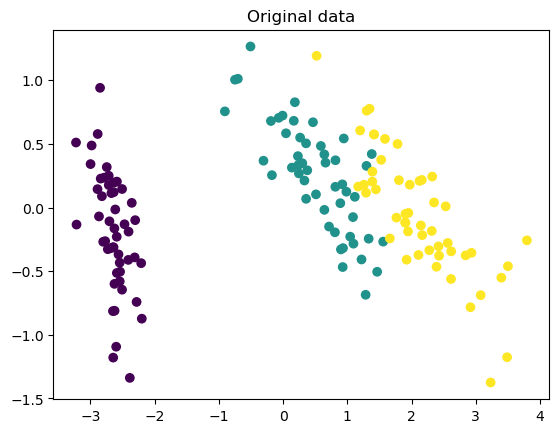

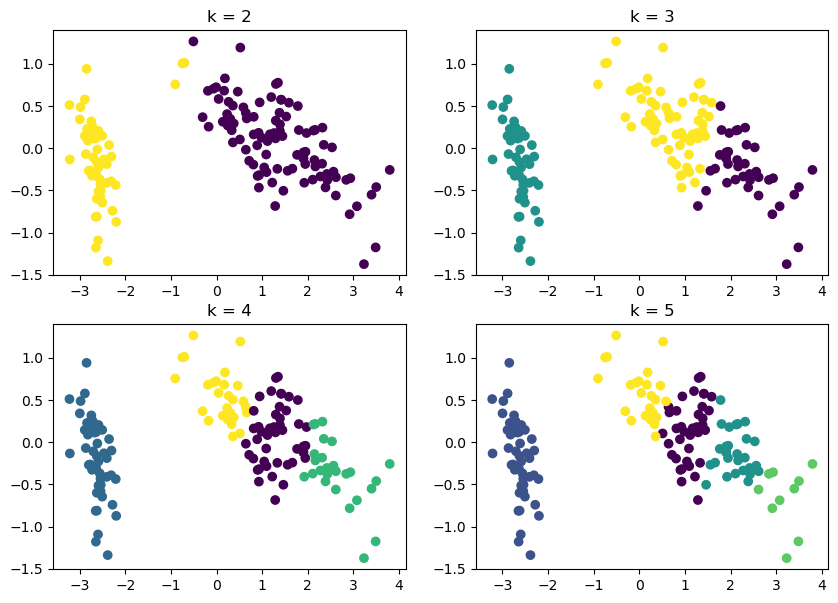

In [281]:
plt.scatter(P[:,0],P[:,1],c=y)
plt.title('Original data')
plt.show()

fig, axs = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(10)
axis = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]
for i in range(len(k)):
    axis[i].scatter(P[:,0], P[:,1],c = yhat_list[i])
    axis[i].set_title('k = ' + str(k[i]))
plt.show()


**Comment:** For k = [3, 4, 5] the k-means algorithms separated the first cluster from the rest of the data with 100% accuracy. However, neither of the rest of the k-means algorithms managed to separate the two last clusters from each other (the teal and the yellow cluster). 

The best approximation would probably be the k = 5 algorithm. At least if we were to group the teal and yellow cluster as the original teal cluster and the purple and green clusters as the original yellow cluster. But then again, we would not have known that the clusters were supposed to be divided like this if we did not have the true labels. 

Considering we only have three different types of flowers, I suppose the k = 3 algorithm divides the data into the most correct groups, but the accuracy of the two last overlapping clusters would not be very good.

# Quantitative Assessment of K-Means (Bachelor and master students)

We used k-means for clustering and we assessed the results qualitatively by visualizing them. However, we often want to be able to measure in a quantitative way how good the clustering was. To do this, we will use a classification task to evaluate numerically the goodness of the representation learned via k-means.

Reload the *iris* dataset. Import a standard `LogisticRegression` classifier from the module `sklearn.linear_model`. Use the k-means representations learned previously (`yhat2,...,yhat5`) and the true label to train the classifier. Evaluate your model on the training data (we do not have a test set, so this procedure will assess the model fit instead of generalization) using the `accuracy_score()` function from the *sklearn.metrics* module. Plot a graph showing how the accuracy score varies when changing the value of k. Comment on the results.

- Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.
- Report the model fit/accuracy on the training set.
- For each value of K:
  - One-Hot-Encode the classes output by the K-means algorithm.
  - Train a Logistic regression model on the K-means classes as input vs the real classes as targets.
  - Calculate model fit/accuracy vs. value of K.
- Plot your results in a graph and comment on the K-means fit.

Accuracy when using PCA matrix as training set 0.967


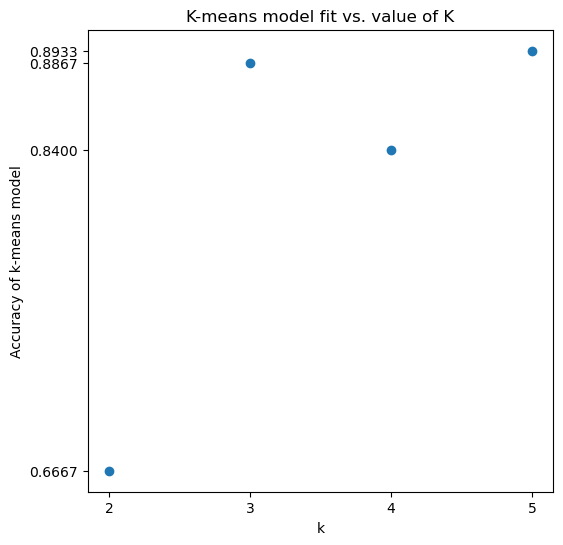

In [379]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

# first two dims of PCA
_, P = pca(X, 2)

# train
logreg = LogisticRegression()
logreg.fit(P, y)

# report accuracy on the "training" set:
y_pred = logreg.predict(P)
print(f"Accuracy when using PCA matrix as training set {metrics.accuracy_score(y, y_pred):.3f}")

# for each value of k
accuracies = []
encoder = preprocessing.OneHotEncoder()
for i in range(len(k)):
    classes = encoder.fit_transform(np.array(yhat_list[i]).reshape(-1, 1)).toarray()
    log_reg = LogisticRegression()
    log_reg.fit(classes, y)
    predicted_classes = log_reg.predict(classes)
    accuracies.append(metrics.accuracy_score(y, predicted_classes))

plt.figure(figsize = (6, 6))
plt.title("K-means model fit vs. value of K")
plt.scatter(k, accuracies)
plt.ylabel("Accuracy of k-means model")
plt.yticks(accuracies)
plt.xlabel("k")
plt.xticks(k)
plt.show()


**Comment:** As with the qualitative assesment, the model with k = 3 and k = 5 are the best fit models. From this plot, we can also see that the k = 4 is not a very bad fit and that the k = 5 model is in fact the best fit of them all. This was very hard to determine qualitatively.

# Conclusions 

In this notebook we studied **unsupervised learning** considering two important and representative algorithms: **PCA** and **k-means**.

First, we implemented the PCA algorithm step by step; we then run the algorithm on synthetic data in order to see its working and evaluate when it may make sense to use it and when not. We then considered two typical uses of PCA: for **visualization** on the *iris* dataset, and for **compression-decompression** on the *lfw* dateset.

We then moved to consider the k-means algorithm. In this case we used the implementation provided by *scikit-learn* and we applied it to another prototypical unsupervised learning problem: **clustering**; we used *k-means* to process the *iris* dataset and we evaluated the results visually.

In the final part, we considered two additional questions that may arise when using the above algorithms. For PCA, we considered the problem of **selection of hyper-parameters**, that is, how we can select the hyper-parameter of ou algorithm in a reasonable fashion. For k-means, we considered the problem of the **quantitative evaluation** of our results, that is, how can we measure the performance or usefulness of our algorithms. 